# **The Workflow of this project is as follows**

**Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.  

**Model training** - create model(s) to learn to predict a target variable based on other variables.  

**Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.  

**Model comparison** - comparing several different models to find the best one.

**Model fine-tuning** - once we've found a good model, how can we improve it?  

**Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?  

**Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?  

**Reporting what we've found** - if we had to present our work, what would we show someone?  
***
This project is done by,  
## **Sarosh Dandoti and Rushikesh Jyoti**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("churn.csv")


# <font color=yellow>**_EDA_**</font> 

In [4]:
# import sweetviz as sv

# report = sv.analyze(df)
# #display the report
# report.show_html('churn.html')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.shape)
print(df.gender.value_counts())
df.InternetService.value_counts()

(7043, 21)
Male      3555
Female    3488
Name: gender, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

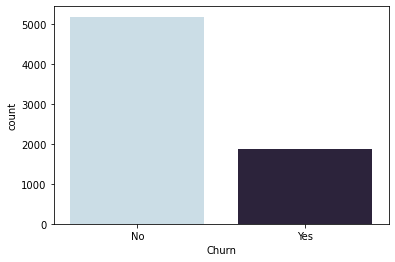

In [5]:
print(df['Churn'].value_counts())

sns.countplot(df['Churn'],  palette= "ch:s=.25,rot=-.25"  )

In [6]:
numStayed = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

print( round( numStayed/(numStayed + numChurned) * 100 , 2 ) ,'%  of customers stayed ')
print( round( numChurned/(numStayed + numChurned) * 100, 2), '%  of customers left ')

73.46 %  of customers stayed 
26.54 %  of customers left 


In [7]:
pd.crosstab(df.gender, df.Churn)
#Phew our data is equally distributed

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


[Text(0.5, 1.0, 'Churn count for both Males and Females')]

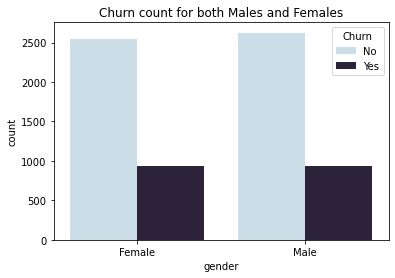

In [8]:


sns.countplot(x ='gender', hue='Churn', data=df , palette= "ch:s=.25,rot=-.25" ).set(title='Churn count for both Males and Females')


<AxesSubplot:>

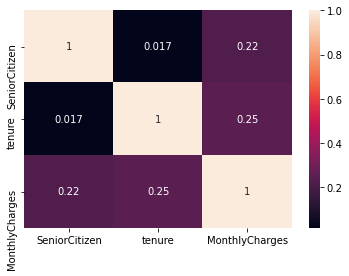

In [12]:
cleandf = df.drop('customerID', axis=1)

sns.heatmap(cleandf.corr(), annot=True)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

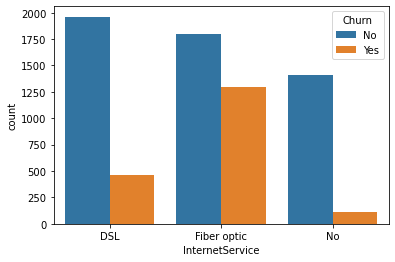

In [14]:
sns.countplot(data=cleandf, x = 'InternetService', hue='Churn')


<AxesSubplot:xlabel='gender', ylabel='count'>

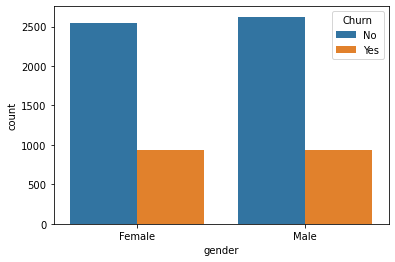

In [15]:
sns.countplot(data=cleandf, x='gender', hue='Churn')


<AxesSubplot:xlabel='Contract', ylabel='count'>

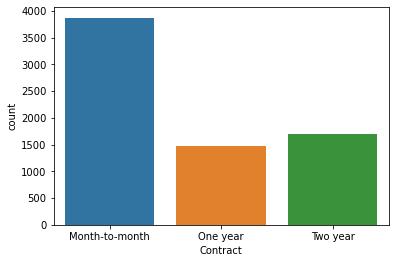

In [16]:

sns.countplot(x = 'Contract', data=cleandf)

# Encoding and Scaling

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



for column in cleandf.columns:
  if cleandf[column].dtype == np.number:
    continue
  cleandf[column] = LabelEncoder().fit_transform(cleandf[column])

We Used Simple Label Encoder , we could however also use a OneHotEncoder but it didnt make a different in the model prediction

Basically , One hot encoding creates new (binary 1,0) columns, indicating the presence of each possible value from the original data.

In [12]:
cleandf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


<AxesSubplot:>

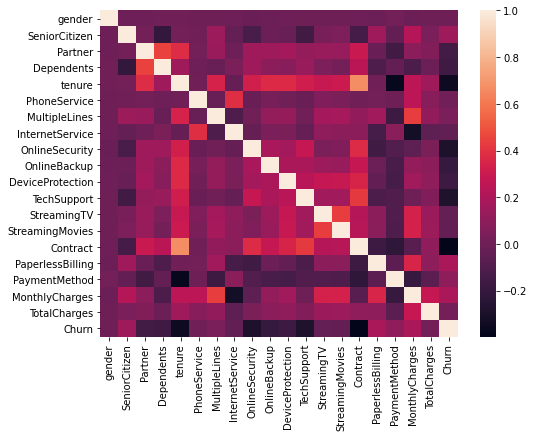

In [13]:
plt.subplots(figsize=(8,6))
sns.heatmap(cleandf.corr() ) 

<AxesSubplot:ylabel='Frequency'>

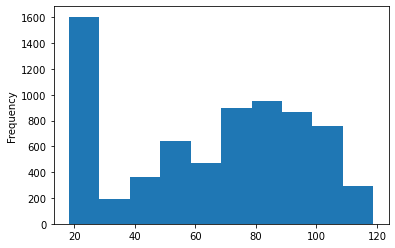

In [14]:
cleandf.MonthlyCharges.plot.hist()

# Outlier Detection

### Lets check if there is some unnecessarily large value in our dataset.
We will use Grubbs Test to verify if we have an outlier value

In [16]:
import scipy.stats as stats
x = np.array(cleandf["MonthlyCharges"])
y = np.array(cleandf["TotalCharges"])
def grubbs_test(x):
    
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")


grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.7943521502604476
Grubbs Critical Value: 4.487636575630421
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 1.7326465156320339
Grubbs Critical Value: 4.487636575630421
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



So our data is really evenly distributed.

In [24]:
dropp = [ "Churn"]

x = cleandf.drop(dropp, axis=1)
y = cleandf['Churn']

x = StandardScaler().fit_transform(x)

# <font color=yellow>**_Model Training_**</font> 

Here we will run different models for classification and see which one is better


In [32]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

#KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

# SGD
sgd  = SGDClassifier(loss = "modified_huber", shuffle=True , random_state= 101)
sgd.fit(xtrain , ytrain)

# SVM
svm = SVC(kernel = "linear" , C = 0.025 , random_state = 101)
svm.fit(xtrain , ytrain)


sgdpred = sgd.predict(xtest)
logregpreds = logreg.predict(xtest)
rfpreds = rf.predict(xtest)
knnpreds = knn.predict(xtest)
svmpred = svm.predict(xtest)


# <font color=yellow>**_Model Comparision_**</font> 

In [39]:
from sklearn.metrics import accuracy_score

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(ytest, logregpreds  )))
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(ytest, rfpreds )))
print('K Neighbours accuracy: {:.3f}'.format(accuracy_score(ytest, knnpreds )))
print('SGD accuracy: {:.3f}'.format(accuracy_score(ytest, sgdpred )))
print('SVM accuracy: {:.3f}'.format(accuracy_score(ytest, svmpred )))
    

Logistic regression accuracy: 0.816
Random Forest accuracy: 0.802
K Neighbours accuracy: 0.776
SGD accuracy: 0.759
SVM accuracy: 0.820


In [40]:
cm= confusion_matrix(ytest , svmpred)
print(cm)
accuracy_score(ytest, svmpred)

[[942  94]
 [160 213]]


0.8197303051809794

# <font color=yellow>**_Model Fine-Tuning_ 🔧**</font>  
### **Hyperparameter Tuning**
Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

Tuning models with  **RandomizedSearchCV**  and **GridSearchCV**
We will tune a number of parameters for Logistic Regression and RandomForestClassifier, you can check them out on Scikit Learn's documentation.

**RandomizedSearchCV** - tries n_iter combinations of hyperparameters and saves the best.  
**GridSearchCV** - tries every single combination of hyperparameters and saves the best.



In [166]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
                # using liblinear because we have a small dataset , whereas ‘sag’ and ‘saga’ are faster for large ones.
                # want to know what these are ? NO, because we have a life.

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20.    
This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [167]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV( LogisticRegression() ,
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [168]:
print(rs_log_reg.best_params_)
rs_log_reg.score(xtest, ytest)

{'solver': 'liblinear', 'C': 1.623776739188721}


0.8176011355571328

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [169]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [170]:
print(rs_rf.best_params_)
rs_rf.score(xtest, ytest)

{'n_estimators': 460, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_depth': None}


0.8105039034776437

LogisticRegression is still at the lead , so lets try to perform GridSearchCV on it to see if we can tune it some more.  
Note -Too much greed for Accuracy can result in you making a bad model

In [171]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [172]:
print(gs_log_reg.best_params_)

# Evaluate the model
gs_log_reg.score(xtest, ytest)

{'C': 1.623776739188721, 'solver': 'liblinear'}


0.8176011355571328

We saw no changes , sad. but our grid only has a maximum of 20 different hyperparameter combinations (look up at np.logspace )

Note: If there are a large amount of hyperparameters combinations in your grid,   
GridSearchCV may take a long time to try them all out.   
This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

# Hyperparameter Tuning for SVM

In [43]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10 ], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV( SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(xtrain, ytrain)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(xtest)
  
# print classification report
print(classification_report(ytest, grid_predictions))

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [1]:
print('SVM accuracy: {:.3f}'.format(accuracy_score(ytest, grid_predictions )))


NameError: name 'accuracy_score' is not defined

# <font color=yellow>**_Evaluating a classification model, beyond accuracy_**</font> 


We have our predicted values so we can get our metrics that we want.  

Lets plot an ROC curve,  
Now whats this ROC curve you say??   
Receiver operating characteristic , DW nobody remembers this , but maybe you should.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

In our dataset Case 
False Positive - Did not left , but shows as the customer did leave
True Positive -  Actually Left , shows as left.


We'll use the GridSearchCV and RandomizedSearch version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.



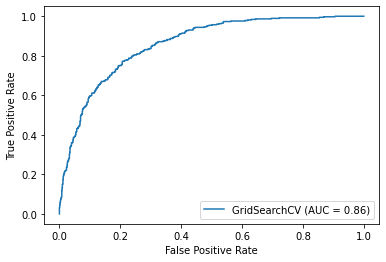

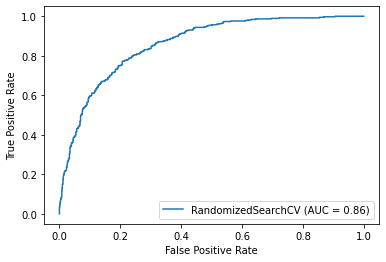

In [173]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, xtest, ytest)
plot_roc_curve(rs_log_reg, xtest, ytest)

A perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

## **Classification Report**

You see a report here basically which you gives you all these values.  
Lets see what they are ...

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.  
               A model which produces no false positives has a precision of 1.0.  

**Recall** - Indicates the proportion of actual positives which were correctly classified.  
  A model which produces no false negatives has a recall of 1.0.  

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.  

**Support** - The number of samples each metric was calculated on.  

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.  

**Macro avg** - Short for macro average, the average precision, recall and F1 score between classes.  
 Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.  

**Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes.  
   Weighted means each metric is calculated with respect to how many samples there are in each class.  
   This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [174]:
print("Log Reg")
print(classification_report(ytest, logregpreds))
print("RandomForest")
print(classification_report(ytest, rfpreds))
print("KNN")
print(classification_report(ytest, knnpreds))

Log Reg
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

RandomForest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

KNN
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1036
           1       0.59      0.45      0.51       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      

All this was on one single train test split, lets do cross validation and try this stuff on multiple sets

# <font color=yellow>**_Cross Validation_**</font> 
 Hippity Hoppity Take Split Data multiple times boppity.
 
 The most commonly used version of cross-validation is k-times cross-validation, where k is a user-specified number, usually 5 or 10.
 
 We will do it for Logreg since it has given us most accuracy.
 You can try for others if you want

scoring parameters we can use are : accuracy , f1 , recall , precision .

In [175]:
clf = LogisticRegression(C=11.288378916846883,   # go up and check rs_logreg best params , thats how we took these values
                         solver="liblinear")  

scores = cross_val_score(rs_log_reg, x, y , cv =5 ,
                                             scoring="accuracy" ) # by default its cv = 3

cv_acc = np.mean(scores)

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf, x ,y, cv=5,
                                       scoring="precision"))

# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,x,y, cv=5, 
                                              scoring="recall")) 

# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf, x,y, cv=5, 
                                     scoring="f1"))


print(cv_acc)
print(cv_precision)    
print(cv_recall)
print(cv_f1)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished


0.8026425091941416
0.6589802668231959
0.5420094335565082
0.5947270929142014


Our Accuracy can be better or worse since the data splitted randomly

<AxesSubplot:title={'center':'Cross-Validated Metrics'}>

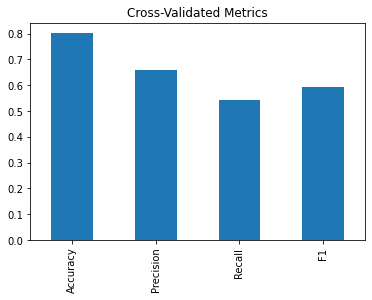

In [176]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);


Sheesh bad bad , well we tried



# <font color=yellow>**_Feature importance_**</font> 

 which features contributing most to the outcomes of the model?



<AxesSubplot:title={'center':'Feature Importance'}>

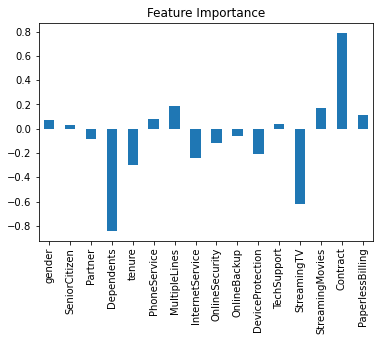

In [177]:
features_dict = dict(zip(cleandf.columns, list(logreg.coef_[0])))

features_df = pd.DataFrame(features_dict, index=[0])

features_df.T.plot.bar(title="Feature Importance", legend=False)



# So XG Boost  🚀

In [178]:
xg = XGBClassifier(n_estimators=1000, learning_rate=0.1)
xg.fit( xtrain, ytrain, early_stopping_rounds=5 , eval_set=[(xtest, ytest)] , verbose=False)


xgpreds = xg.predict(xtest)

#print('XGBoost accuracy: {:.3f}'.format(accuracy_score(ytest, xgpreds  )))
cm= confusion_matrix(ytest , xgpreds)
print(cm)

accuracy_score(ytest, xgpreds)

[21:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[943  93]
 [172 201]]


0.8119233498935415

In [179]:
from sklearn.metrics import mean_absolute_error

predictions = xg.predict(xtest)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, ytest)))

Mean Absolute Error: 0.1880766501064585


# Summary


## So why did we do all this ?  
 ### Well we took a look at different HyperParameter tricks and few tips.  
 
<font size="3">
Should you always do dabble with parameters ? No need.
    
Do i need to try on so many models, well theres always tricks to choose which model you should try according to your Dataset.  
But how long does it take to try ?  

For example :  
 if the training data is smaller or if the dataset has a fewer number of observations and a higher number of features textual data,   
 choose algorithms like Linear regression, Naïve Bayes, or Linear SVM.

 If the training data is sufficiently large and the number of observations is higher as compared to the number of features,  
 one can go for low bias/high variance algorithms like KNN, Decision trees, or kernel SVM. 


Algorithms like Naïve Bayes and Linear and Logistic regression are easy to implement and quick to run.  
Algorithms like SVM, which involve tuning of parameters, Neural networks with high convergence time, and random forests,  
need a lot of time to train the data.

Here is a cheat sheet that details the algorithms you can use for different types of machine learning problems.
</font>

<img src="cheatsheet.png" alt="Cheat Sheet" title="ML Cheat Sheet" />



### Well Thank you for reading this Notebook.  
### We hope you enjoyed reading and gained some insights.
### 
### This Project was done by,
### Sarosh Dandoti and Rushikesh Jyoti
